# Data Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Categorical data encoding

- Nominal, e.g., 
$$
    \{\text{red}, \text{blue}, \text{green}\}
$$
Discrete/categorical **with no** ordering

- Ordinal, e.g., 
$$
    \{\text{Very Important}, \text{Important}, \text{Neutral}, \text{Unimportant}, \text{Very Unimportant}\}
$$
Discrete/categorical **with** ordering


In [2]:
df = pd.DataFrame({
    'gender': ['male', 'female', 'male', 'other'],
    'color': ['Red', 'Green', 'Green', 'Blue'],
    'response': ['Agree', 'Neutral', 'Disagree', 'Agree']
})

df

,gender,color,response
0,male,Red,Agree
1,female,Green,Neutral
2,male,Green,Disagree
3,other,Blue,Agree


Nominal categorical variables $\rightarrow$ Dummy encoding 

In [5]:
df_enc = pd.get_dummies(df, columns=['gender', 'color'])*1

df_enc

,response,gender_female,gender_male,gender_other,color_Blue,color_Green,color_Red
0,Agree,0,1,0,0,0,1
1,Neutral,1,0,0,0,1,0
2,Disagree,0,1,0,0,1,0
3,Agree,0,0,1,1,0,0


Ordinal categorical variables $\rightarrow$ Label encoding

In [6]:
vals, idx = pd.factorize(df_enc['response'])
vals, idx

(array([0, 1, 2, 0]), Index(['Agree', 'Neutral', 'Disagree'], dtype='object'))

In [7]:
df_enc['response'] = vals

df_enc

,response,gender_female,gender_male,gender_other,color_Blue,color_Green,color_Red
0,0,0,1,0,0,0,1
1,1,1,0,0,0,1,0
2,2,0,1,0,0,1,0
3,0,0,0,1,1,0,0


### Continuous data

(500, 2)

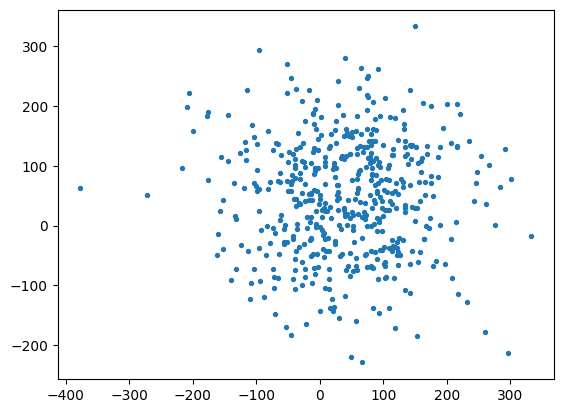

In [18]:
x = np.random.normal(loc=50, scale=100, size=(500, 2))

plt.scatter(x[:, 0], x[:, 1], s=8)

x.shape

## Min-max normalisation

For each variable $x \in X$, enumerate rows of column $x$ indexed by $x_i$, and perform: 
$$
    x_i' = \dfrac{x_i - \min(X)}{\max(X) - \min(X)}
$$

**Effect**: for all $i$, range $x_i \in [L, U]$ is transformed to $x_i' \in [0, 1]$ 

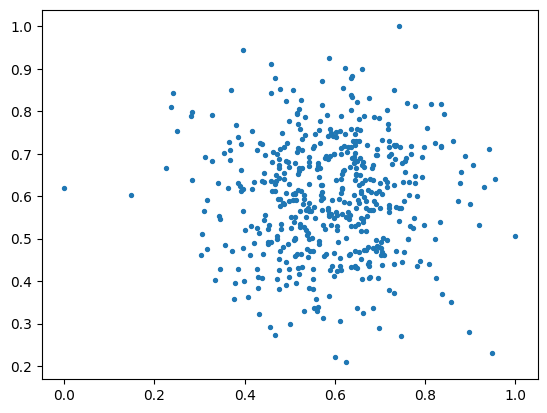

In [19]:
x_norm = (x - x.min()) / (x.max() - x.min())

plt.scatter(x_norm[:, 0], x_norm[:, 1], s=8)

## Standardisation / $z$-normalisation:

Create standardized variables $z_i$ from $x_i$:
$$
    z_i = \dfrac{x_i - \mu_x}{\sigma_x}
$$
where:
- $\mu_x$ is the mean of $x$
- $\sigma_X$ is the standard deviation of $x$

**Effects**: 
- given $x_i \sim \mathcal{N}(\mu_x, \sigma_x^2)$, then $z_i \sim \mathcal{N}(0, 1)$
- subtracting mean $\mu_x$ moves data to the origin (zero), dividing by $\sigma_x$ scales data units to standard deviations

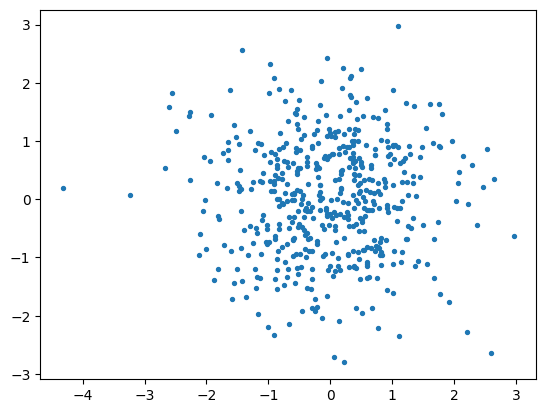

In [20]:
z = (x - x.mean()) / x.std()

plt.scatter(z[:, 0], z[:, 1], s=8)

## Data imputation

Three simple methods:
- Drop missing rows
- Imputate missing data with the mean
- Imputate missing data with nearest neighbour

In [21]:
df = pd.DataFrame([
    [np.nan, 6, 0], 
    [2, 6, np.nan], 
    [3, 6, 0], 
    [np.nan, 6, np.nan], 
    [5, np.nan, 1],
])

df

,0,1,2
0,NaN,6.0,0.0
1,2.0,6.0,NaN
2,3.0,6.0,0.0
3,NaN,6.0,NaN
4,5.0,NaN,1.0


In [22]:
# drop missing values
df.dropna()

,0,1,2
2,3.0,6.0,0.0


In [23]:
# mean imputation
df.fillna(df.mean())

,0,1,2
0,3.333333,6.0,0.000000
1,2.000000,6.0,0.333333
2,3.000000,6.0,0.000000
3,3.333333,6.0,0.333333
4,5.000000,6.0,1.000000


In [24]:
from sklearn.impute import KNNImputer

df_imputed = pd.DataFrame(KNNImputer(n_neighbors=2).fit_transform(df))

df_imputed

,0,1,2
0,2.5,6.0,0.0
1,2.0,6.0,0.0
2,3.0,6.0,0.0
3,2.5,6.0,0.0
4,5.0,6.0,1.0


## Outlier detection

In [26]:
np.random.seed(42)
data = pd.DataFrame({
    'value': np.random.normal(0, 1, 1000)
})
data

,value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
995,-0.281100
996,1.797687
997,0.640843
998,-0.571179


<Axes: >

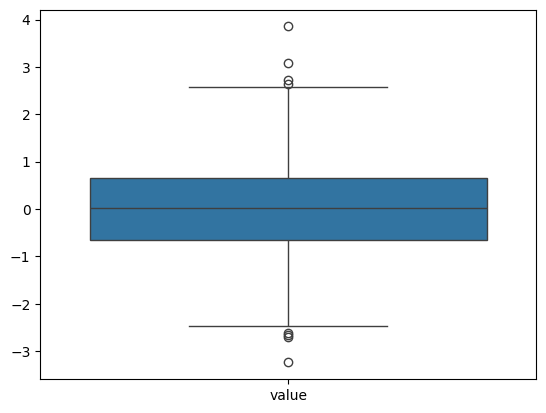

In [27]:
sns.boxplot(data)

In [28]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers
outliers = detect_outliers_iqr(data['value'])

print(f"Number of outliers detected: {sum(outliers)}")
data[outliers]

Number of outliers detected: 8


,value
74,-2.619745
179,2.720169
209,3.852731
262,-3.241267
478,3.078881
646,-2.696887
668,-2.650970
755,2.632382


## Exercise 1

In [29]:
df = pd.read_csv('../datasets/ToyotaCorolla.csv')


df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,0,1,1,1,0,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,1,0,0,1,1,0,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,1,0,0,0,1,0,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,1,0,0,0,0


In [30]:
df.dtypes

Id                    int64
Model                object
Price                 int64
Age_08_04             int64
Mfg_Month             int64
Mfg_Year              int64
KM                    int64
Fuel_Type            object
HP                    int64
Met_Color             int64
Color                object
Automatic             int64
CC                    int64
Doors                 int64
Cylinders             int64
Gears                 int64
Quarterly_Tax         int64
Weight                int64
Mfr_Guarantee         int64
BOVAG_Guarantee       int64
Guarantee_Period      int64
ABS                   int64
Airbag_1              int64
Airbag_2              int64
Airco                 int64
Automatic_airco       int64
Boardcomputer         int64
CD_Player             int64
Central_Lock          int64
Powered_Windows       int64
Power_Steering        int64
Radio                 int64
Mistlamps             int64
Sport_Model           int64
Backseat_Divider      int64
Metallic_Rim        

In [31]:
object_df = df.select_dtypes(include='object')

object_df

,Model,Fuel_Type,Color
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Silver
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Blue
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,Diesel,Black
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,Diesel,Black
...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,Petrol,Blue
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Blue
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,Petrol,Grey


In [32]:
object_df.nunique()

Model        319
Fuel_Type      3
Color         10
dtype: int64

In [33]:
object_df_dummies = pd.get_dummies(object_df)
object_df_dummies

,Model_TOYOTA Corolla,Model_TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors,Model_TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors,Model_TOYOTA Corolla 1.3 16V 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-Doors,...,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [34]:
numeric_df = df.select_dtypes(include='number').drop(columns=['Id'])

numeric_df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,0,0,0,1,0,0,0,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,1,0,0,0,1,0,0,0,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,1,1,0,1,1,1,0,0,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,1,0,0,1,1,0,0,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,1,0,0,0,1,0,0,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,0,0,1,0,0,0,0


<Axes: >

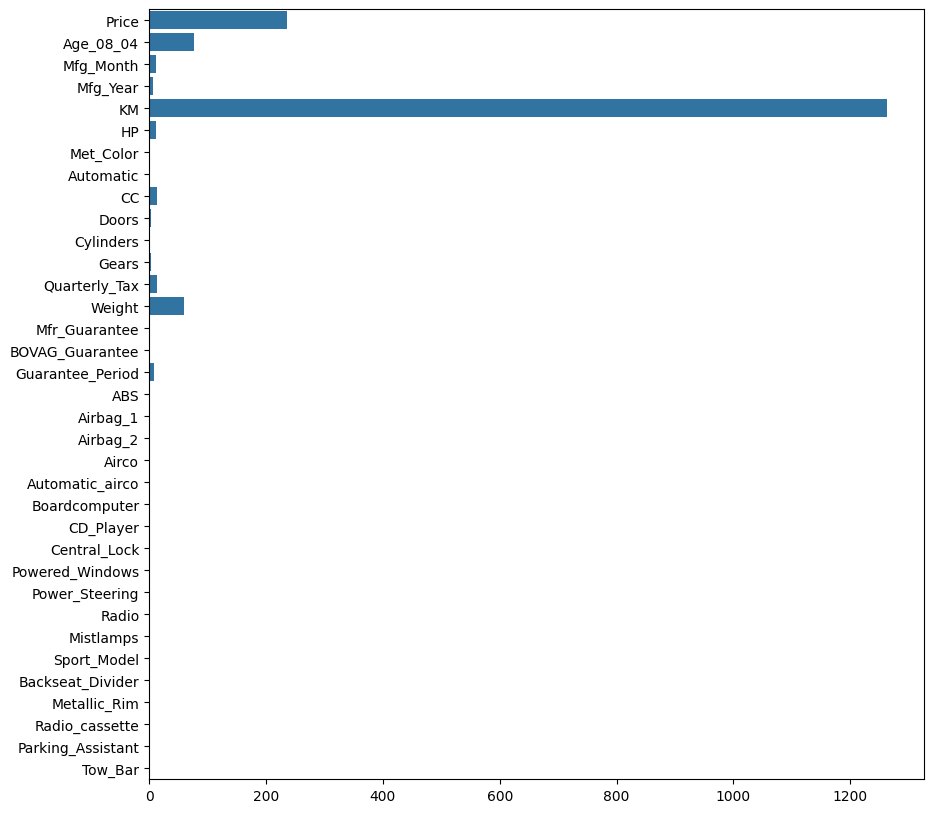

In [35]:
plt.figure(figsize=(10, 10))
sns.barplot(numeric_df.nunique(), orient='h')

In [36]:
numeric_df.nunique()

Price                 236
Age_08_04              77
Mfg_Month              12
Mfg_Year                7
KM                   1263
HP                     12
Met_Color               2
Automatic               2
CC                     13
Doors                   4
Cylinders               1
Gears                   4
Quarterly_Tax          13
Weight                 59
Mfr_Guarantee           2
BOVAG_Guarantee         2
Guarantee_Period        9
ABS                     2
Airbag_1                2
Airbag_2                2
Airco                   2
Automatic_airco         2
Boardcomputer           2
CD_Player               2
Central_Lock            2
Powered_Windows         2
Power_Steering          2
Radio                   2
Mistlamps               2
Sport_Model             2
Backseat_Divider        2
Metallic_Rim            2
Radio_cassette          2
Parking_Assistant       2
Tow_Bar                 2
dtype: int64

In [37]:
# column has only 1 value, making it meaningless
numeric_df['Cylinders']

0       4
1       4
2       4
3       4
4       4
       ..
1431    4
1432    4
1433    4
1434    4
1435    4
Name: Cylinders, Length: 1436, dtype: int64

In [38]:
idx_binary_cols = np.where(numeric_df.nunique() == 2)[0]

idx_binary_cols

array([ 6,  7, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34])

In [39]:
idx_integer_cols = [i for i in range(numeric_df.shape[1]) if i not in idx_binary_cols]
idx_integer_cols

[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 16]

In [40]:
binary_numeric_df = numeric_df.iloc[:, idx_binary_cols]
integer_numeric_df = numeric_df.iloc[:, idx_integer_cols]


In [41]:
binary_numeric_df

,Met_Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,0,0,1,1,1,1,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,1,0,0,1,1,1,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
2,1,0,1,1,1,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,1,1,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,1,1,1,1,1,0,1,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1,0,1,1,1,1,1,1,0,0,...,1,1,0,1,1,1,0,0,0,0
1432,0,0,0,1,1,1,1,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1433,0,0,0,1,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1434,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [42]:
integer_numeric_df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Guarantee_Period
0,13500,23,10,2002,46986,90,2000,3,4,5,210,1165,3
1,13750,23,10,2002,72937,90,2000,3,4,5,210,1165,3
2,13950,24,9,2002,41711,90,2000,3,4,5,210,1165,3
3,14950,26,7,2002,48000,90,2000,3,4,5,210,1165,3
4,13750,30,3,2002,38500,90,2000,3,4,5,210,1170,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1300,3,4,5,69,1025,3
1432,10845,72,9,1998,19000,86,1300,3,4,5,69,1015,3
1433,8500,71,10,1998,17016,86,1300,3,4,5,69,1015,3
1434,7250,70,11,1998,16916,86,1300,3,4,5,69,1015,3


In [43]:
# normalize integer columns
norm_integer_numeric_df = (integer_numeric_df - integer_numeric_df.mean()) / integer_numeric_df.std()
norm_integer_numeric_df

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Guarantee_Period
0,0.763497,-1.771349,1.327114,1.541259,-0.574495,-0.767774,0.997072,-1.084761,NaN,-0.140376,2.987639,1.757949,-0.270825
1,0.832425,-1.771349,1.327114,1.541259,0.117413,-0.767774,0.997072,-1.084761,NaN,-0.140376,2.987639,1.757949,-0.270825
2,0.887567,-1.717586,1.028970,1.541259,-0.715137,-0.767774,0.997072,-1.084761,NaN,-0.140376,2.987639,1.757949,-0.270825
3,1.163280,-1.610059,0.432682,1.541259,-0.547459,-0.767774,0.997072,-1.084761,NaN,-0.140376,2.987639,1.757949,-0.270825
4,0.832425,-1.395005,-0.759893,1.541259,-0.800749,-0.767774,0.997072,-1.084761,NaN,-0.140376,2.987639,1.852931,-0.270825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.890779,0.701771,1.923402,-1.054926,-1.279494,-1.034778,-0.652367,-1.084761,NaN,-0.140376,-0.440632,-0.901569,-0.270825
1432,0.031480,0.863061,1.028970,-1.054926,-1.320660,-1.034778,-0.652367,-1.084761,NaN,-0.140376,-0.440632,-1.091535,-0.270825
1433,-0.615067,0.809298,1.327114,-1.054926,-1.373557,-1.034778,-0.652367,-1.084761,NaN,-0.140376,-0.440632,-1.091535,-0.270825
1434,-0.959707,0.755534,1.625258,-1.054926,-1.376224,-1.034778,-0.652367,-1.084761,NaN,-0.140376,-0.440632,-1.091535,-0.270825


In [44]:
# combine everything together
df_combined = pd.concat([object_df_dummies, norm_integer_numeric_df, binary_numeric_df], axis=1)
df_combined

,Model_TOYOTA Corolla,Model_TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors,Model_TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors,Model_TOYOTA Corolla 1.3 16V 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA AUT3 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors,Model_TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3 2/3-Doors,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,False,False,False,False,False,False,False,False,False,False,...,1,1,0,0,0,1,0,0,0,0
1,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,0,1,0,0,0,0
2,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,0,1,0,0,0,0
3,False,False,False,False,False,False,False,False,False,False,...,0,1,0,0,0,1,0,0,0,0
4,False,False,False,False,False,False,False,False,False,False,...,1,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,True,False,False,False,False,...,1,1,0,1,1,1,0,0,0,0
1432,False,False,False,False,False,False,False,False,True,False,...,0,1,0,0,1,1,0,0,0,0
1433,False,False,False,False,False,False,False,False,True,False,...,0,1,0,0,0,1,0,0,0,0
1434,False,False,False,False,False,False,False,False,True,False,...,0,0,0,0,0,1,0,0,0,0


## Exercise 2

In [2]:
df = pd.read_csv('../datasets/dataset2.csv', sep=';', header=None)

df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.738311,0.669113,0.622368,0.604638,0.686878,0.477681,0.121617,0.978462,0.300009,0.077292,...,0.351451,0.836373,0.254109,0.598209,0.247565,0.673344,0.759184,0.198403,0.017437,0.328162
1,0.398991,0.487942,0.617453,0.672083,0.692769,0.934176,0.190402,0.981219,0.300839,0.146356,...,0.478566,0.732855,0.032738,0.333436,0.137633,0.764767,0.059627,0.378524,0.499575,0.085322
2,0.140433,0.135107,0.228465,0.876200,0.386447,0.656123,0.523236,0.575943,0.081488,0.809256,...,0.338642,0.715689,0.807617,0.086523,0.449743,0.796373,0.569684,0.258360,0.239836,0.469882
3,0.193457,0.236073,0.254791,0.164874,0.920559,0.683868,0.027836,0.724134,0.793451,0.584538,...,0.434057,0.740642,0.897616,0.802401,0.733303,0.527035,0.053701,0.025047,0.824955,0.701065
4,0.077076,0.441993,0.422593,0.766592,0.131284,0.866207,0.847329,0.602439,0.767783,0.683798,...,0.115863,0.882312,0.343852,0.177056,0.649450,0.377550,0.632784,0.421226,0.746538,0.929634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.445704,0.415438,0.011887,0.329353,0.130387,0.980425,0.213232,0.835856,0.895957,0.486913,...,0.951909,0.251381,0.935265,0.120924,0.097420,0.507825,0.680404,0.474988,0.097214,0.722691
74,0.241968,0.170564,0.371360,0.745260,0.838933,0.167941,0.516185,0.294448,0.520514,0.138215,...,0.277605,0.383140,0.695454,0.826495,0.646058,0.508483,0.789450,0.983768,0.367226,0.723384
75,0.935079,0.396045,0.262564,0.730501,0.605815,0.062384,0.490049,0.568162,0.502204,0.635892,...,0.149460,0.624562,0.646170,0.566910,0.189663,0.429716,0.893446,0.098203,0.048452,0.663627
76,0.713777,0.806716,0.133408,0.513149,0.309769,0.302984,0.856029,0.320610,0.071119,0.325576,...,0.734686,0.459038,0.396459,0.751803,0.468092,0.100379,0.077075,0.767564,0.798329,0.384088


In [3]:
df.isna().sum().sum()

np.int64(19)

<Axes: >

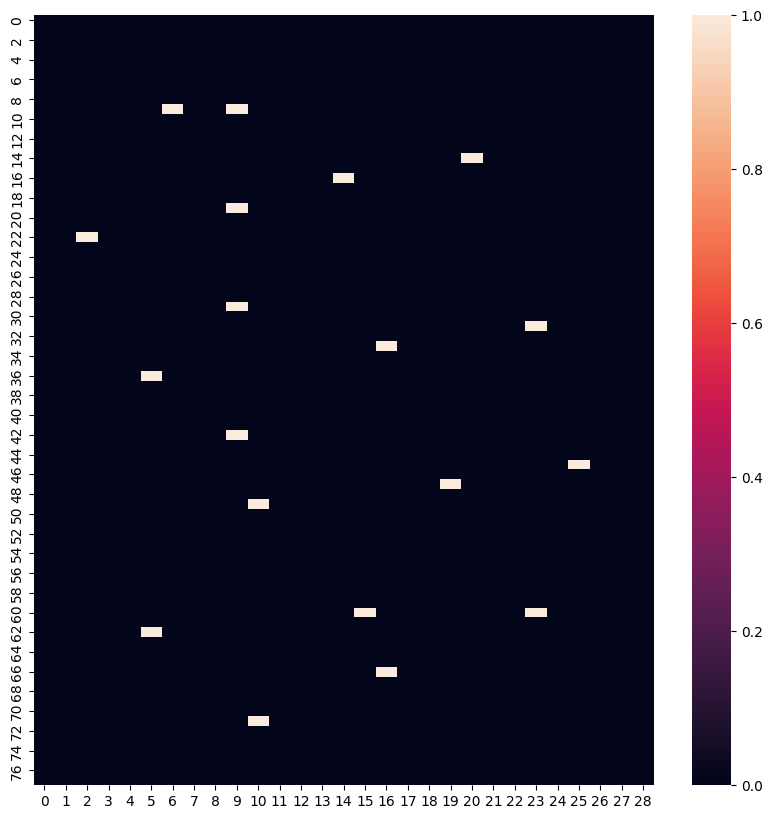

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.isna())

In [5]:
# drop missing values
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.738311,0.669113,0.622368,0.604638,0.686878,0.477681,0.121617,0.978462,0.300009,0.077292,...,0.351451,0.836373,0.254109,0.598209,0.247565,0.673344,0.759184,0.198403,0.017437,0.328162
1,0.398991,0.487942,0.617453,0.672083,0.692769,0.934176,0.190402,0.981219,0.300839,0.146356,...,0.478566,0.732855,0.032738,0.333436,0.137633,0.764767,0.059627,0.378524,0.499575,0.085322
2,0.140433,0.135107,0.228465,0.876200,0.386447,0.656123,0.523236,0.575943,0.081488,0.809256,...,0.338642,0.715689,0.807617,0.086523,0.449743,0.796373,0.569684,0.258360,0.239836,0.469882
3,0.193457,0.236073,0.254791,0.164874,0.920559,0.683868,0.027836,0.724134,0.793451,0.584538,...,0.434057,0.740642,0.897616,0.802401,0.733303,0.527035,0.053701,0.025047,0.824955,0.701065
4,0.077076,0.441993,0.422593,0.766592,0.131284,0.866207,0.847329,0.602439,0.767783,0.683798,...,0.115863,0.882312,0.343852,0.177056,0.649450,0.377550,0.632784,0.421226,0.746538,0.929634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.445704,0.415438,0.011887,0.329353,0.130387,0.980425,0.213232,0.835856,0.895957,0.486913,...,0.951909,0.251381,0.935265,0.120924,0.097420,0.507825,0.680404,0.474988,0.097214,0.722691
74,0.241968,0.170564,0.371360,0.745260,0.838933,0.167941,0.516185,0.294448,0.520514,0.138215,...,0.277605,0.383140,0.695454,0.826495,0.646058,0.508483,0.789450,0.983768,0.367226,0.723384
75,0.935079,0.396045,0.262564,0.730501,0.605815,0.062384,0.490049,0.568162,0.502204,0.635892,...,0.149460,0.624562,0.646170,0.566910,0.189663,0.429716,0.893446,0.098203,0.048452,0.663627
76,0.713777,0.806716,0.133408,0.513149,0.309769,0.302984,0.856029,0.320610,0.071119,0.325576,...,0.734686,0.459038,0.396459,0.751803,0.468092,0.100379,0.077075,0.767564,0.798329,0.384088


In [6]:
# mean imputation
df.fillna(df.mean())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.738311,0.669113,0.622368,0.604638,0.686878,0.477681,0.121617,0.978462,0.300009,0.077292,...,0.351451,0.836373,0.254109,0.598209,0.247565,0.673344,0.759184,0.198403,0.017437,0.328162
1,0.398991,0.487942,0.617453,0.672083,0.692769,0.934176,0.190402,0.981219,0.300839,0.146356,...,0.478566,0.732855,0.032738,0.333436,0.137633,0.764767,0.059627,0.378524,0.499575,0.085322
2,0.140433,0.135107,0.228465,0.876200,0.386447,0.656123,0.523236,0.575943,0.081488,0.809256,...,0.338642,0.715689,0.807617,0.086523,0.449743,0.796373,0.569684,0.258360,0.239836,0.469882
3,0.193457,0.236073,0.254791,0.164874,0.920559,0.683868,0.027836,0.724134,0.793451,0.584538,...,0.434057,0.740642,0.897616,0.802401,0.733303,0.527035,0.053701,0.025047,0.824955,0.701065
4,0.077076,0.441993,0.422593,0.766592,0.131284,0.866207,0.847329,0.602439,0.767783,0.683798,...,0.115863,0.882312,0.343852,0.177056,0.649450,0.377550,0.632784,0.421226,0.746538,0.929634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.445704,0.415438,0.011887,0.329353,0.130387,0.980425,0.213232,0.835856,0.895957,0.486913,...,0.951909,0.251381,0.935265,0.120924,0.097420,0.507825,0.680404,0.474988,0.097214,0.722691
74,0.241968,0.170564,0.371360,0.745260,0.838933,0.167941,0.516185,0.294448,0.520514,0.138215,...,0.277605,0.383140,0.695454,0.826495,0.646058,0.508483,0.789450,0.983768,0.367226,0.723384
75,0.935079,0.396045,0.262564,0.730501,0.605815,0.062384,0.490049,0.568162,0.502204,0.635892,...,0.149460,0.624562,0.646170,0.566910,0.189663,0.429716,0.893446,0.098203,0.048452,0.663627
76,0.713777,0.806716,0.133408,0.513149,0.309769,0.302984,0.856029,0.320610,0.071119,0.325576,...,0.734686,0.459038,0.396459,0.751803,0.468092,0.100379,0.077075,0.767564,0.798329,0.384088


In [7]:
from sklearn.impute import KNNImputer

df_imputed = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(df))

df_imputed

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.738311,0.669113,0.622368,0.604638,0.686878,0.477681,0.121617,0.978462,0.300009,0.077292,...,0.351451,0.836373,0.254109,0.598209,0.247565,0.673344,0.759184,0.198403,0.017437,0.328162
1,0.398991,0.487942,0.617453,0.672083,0.692769,0.934176,0.190402,0.981219,0.300839,0.146356,...,0.478566,0.732855,0.032738,0.333436,0.137633,0.764767,0.059627,0.378524,0.499575,0.085322
2,0.140433,0.135107,0.228465,0.876200,0.386447,0.656123,0.523236,0.575943,0.081488,0.809256,...,0.338642,0.715689,0.807617,0.086523,0.449743,0.796373,0.569684,0.258360,0.239836,0.469882
3,0.193457,0.236073,0.254791,0.164874,0.920559,0.683868,0.027836,0.724134,0.793451,0.584538,...,0.434057,0.740642,0.897616,0.802401,0.733303,0.527035,0.053701,0.025047,0.824955,0.701065
4,0.077076,0.441993,0.422593,0.766592,0.131284,0.866207,0.847329,0.602439,0.767783,0.683798,...,0.115863,0.882312,0.343852,0.177056,0.649450,0.377550,0.632784,0.421226,0.746538,0.929634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.445704,0.415438,0.011887,0.329353,0.130387,0.980425,0.213232,0.835856,0.895957,0.486913,...,0.951909,0.251381,0.935265,0.120924,0.097420,0.507825,0.680404,0.474988,0.097214,0.722691
74,0.241968,0.170564,0.371360,0.745260,0.838933,0.167941,0.516185,0.294448,0.520514,0.138215,...,0.277605,0.383140,0.695454,0.826495,0.646058,0.508483,0.789450,0.983768,0.367226,0.723384
75,0.935079,0.396045,0.262564,0.730501,0.605815,0.062384,0.490049,0.568162,0.502204,0.635892,...,0.149460,0.624562,0.646170,0.566910,0.189663,0.429716,0.893446,0.098203,0.048452,0.663627
76,0.713777,0.806716,0.133408,0.513149,0.309769,0.302984,0.856029,0.320610,0.071119,0.325576,...,0.734686,0.459038,0.396459,0.751803,0.468092,0.100379,0.077075,0.767564,0.798329,0.384088


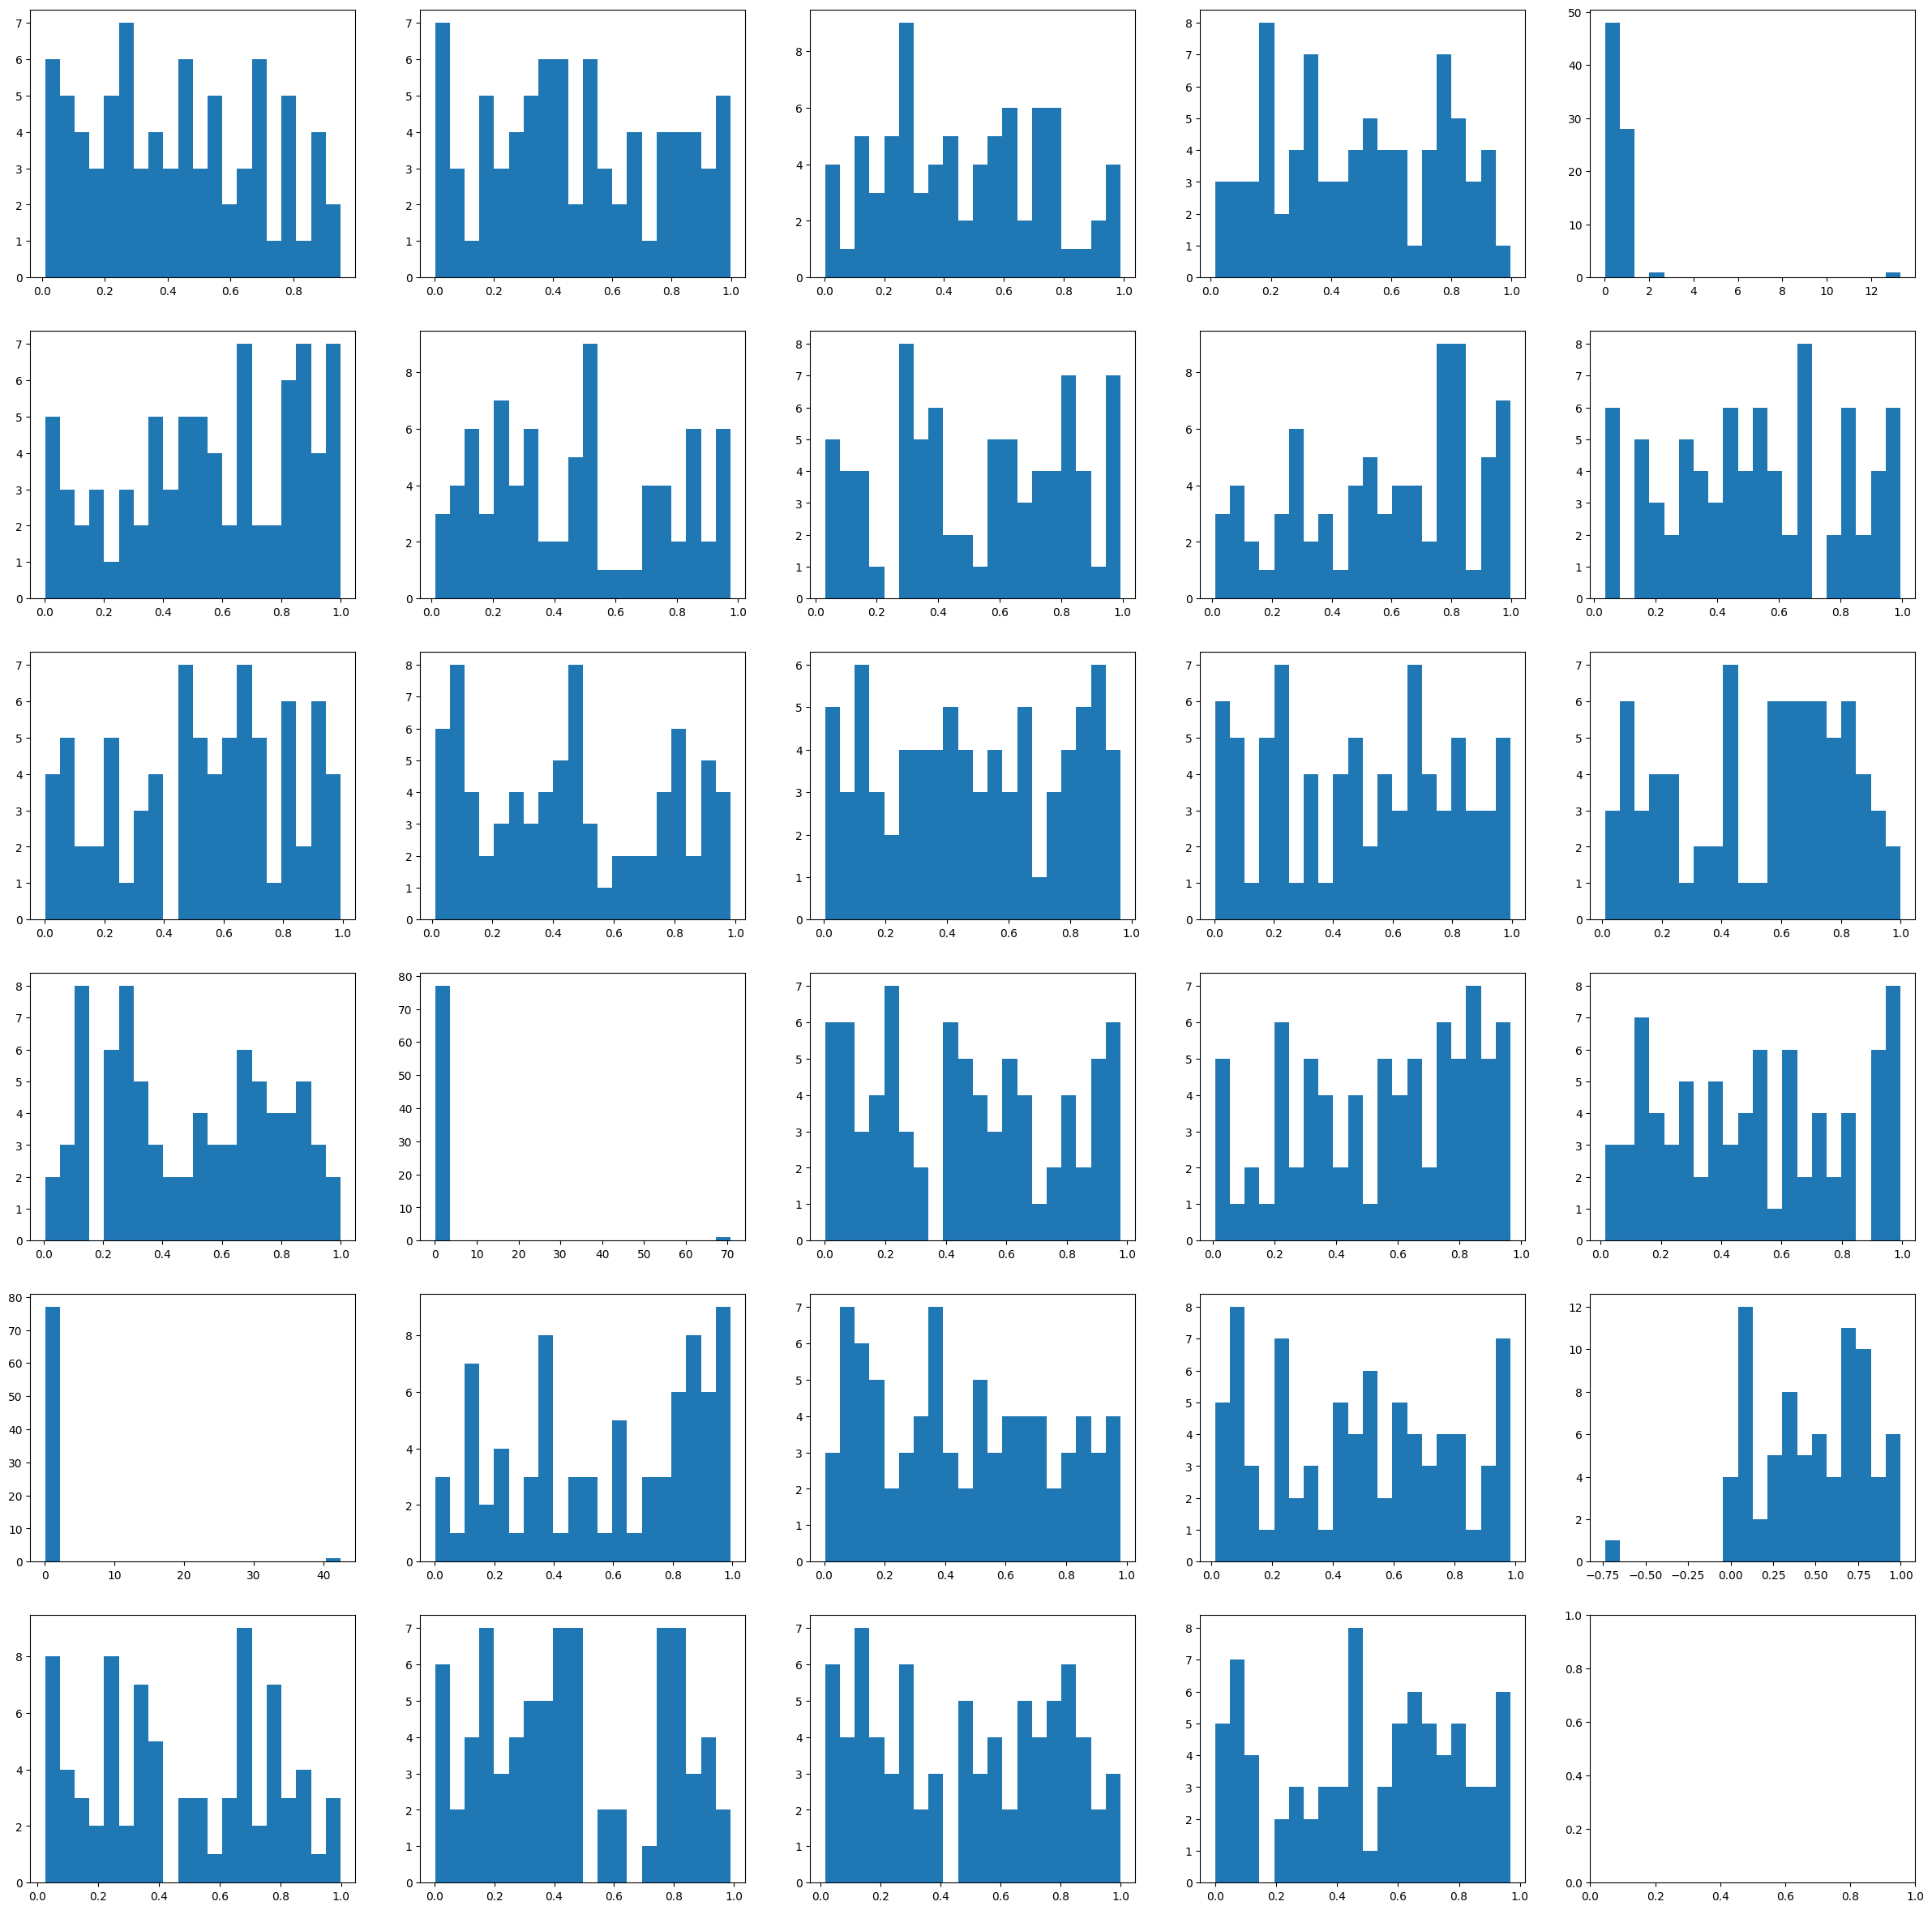

In [8]:
fig, axes = plt.subplots(6, 5, figsize=(30, 30))
axes = axes.flatten()

for ax, col in zip(axes, df_imputed.columns):
    
    col_df = df_imputed[col]

    ax.hist(col_df, bins=20)

plt.show()